# Introductory Course to Image Analysis in Life Science

**Hui Li**  
[GitHub Profile](https://github.com/Huili61)  
Doctoral Student in Machine Learning, Precision Medicine and Diagnostics  
**Chalmers University of Technology**  
Email: hui.li@chalmers.se | lihui61ui@gamil.com

---

### Final Exam – 2024

In this thesis, I developed an image analysis workflow to:

1. **Segment** the nucleus and heterochromatin areas.
2. **Count** the Nuclear Pore Complex (NPC) objects.
3. **Measure** the total area and average fluorescence of the regions of interest (ROI).
4. **Compare** the differences of selected variables across three time conditions: 18d, 28d, and 37d.


### Workflow Overview

Nuclei outlines were segmented through morphological operations to measure the quantity and average fluorescence of NPCs.

After running the script [nucleus.ijm.ijm](./nucleus.ijm.ijm) and this Jupyter Notebook, I extracted the following variables from images:

- **Nucleus Area** (`nucleus_area`): Segmented from channel 3 (DNA channel).
- **Heterochromatin Area** (`hetero_area`): High-intensity regions within nucleus on channel 3.
- **Heterochromatin Ratio** (`hetero_ratio`): Ratio of heterochromatin to the total nuclear area, computed by (`hetero_area / nucleus_area`).
- **Nuclear Average Intensity** (`nucleus_mean_intensity`): Average intensity of nucleus.
- **Heterochromatin Average Intensity** (`hetero_mean_intensity`): Average intensity of heterochromatin.
- **NPC Count** (`npc_count`): Number of NPC objects on nuclear membrane (channel 1).
- **NPC Average Fluorescence** (`npc_mean_fluorescence`): Average fluorescence of NPC objects on nuclear membrane.
- **Time Conditions** (`time`): Time points for comparison: 18d, 28d, and 37d.

The differences of these variables across three time conditions: **18d**, **28d**, and **37d** were illustrated in this Jupyter Notebook.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# path
output_dir = "C:/Users/lihu/Desktop/homework/output/"
original_table = 'results0.csv'
new_table = 'results.csv'

# read table
df = pd.read_csv(os.path.join(output_dir,original_table))

# extract time
df.loc[df['file_name'].str.contains('18d'), 'time'] = '18d'
df.loc[df['file_name'].str.contains('28d'), 'time'] = '28d'
df.loc[df['file_name'].str.contains('37d'), 'time'] = '37d'

# calculate the ratio of heterochromatin_area/nucleus_area
df['hetero_ratio'] = (df['hetero_area'] / df['nucleus_area']) * 100
df.drop([' '], axis=1, inplace=True)

# save
df.to_csv(os.path.join(output_dir,new_table),index=None)
df.sample(5)


,file_name,nucleus_area,hetero_area,nucleus_mean_intensity,hetero_mean_intensity,npc_count,npc_mean_fluorescence,time,hetero_ratio
20,AC16_Rep1_28d24h_HNRNPC488_NUP594_17_SIR_THR_A...,422.003000,135.225000,2216.872,3200.452,195,2317.456,28d,32.043611
27,AC16_Rep1_37d_HNRNPC488_NUP594_19_SIR_THR_ALN-...,0.000003,0.000001,2970.289,3823.096,137,4559.992,37d,34.969503
12,AC16_Rep1_28d24h_HNRNPC488_NUP594_02_SIR_THR_A...,411.650000,113.765000,1950.697,3006.963,187,2630.817,28d,27.636342
23,AC16_Rep1_37d_HNRNPC488_NUP594_09_SIR_THR_ALN-...,0.000004,0.000001,2081.839,3314.653,167,3705.757,37d,26.841019
22,AC16_Rep1_28d24h_HNRNPC488_NUP594_25_SIR_THR_A...,539.377000,110.351000,6506.090,13206.907,162,2612.828,28d,20.458974


In [3]:
def distribution_plot(df, variables, title):
    """Distribution plot: combined histogram and box plot
       histplot: group by 'time' (hue='time'),
       box_pot: x = 'time'
    """
    
    # Create subplots: 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100)
    
    # color
    custom_palette = ['#e41a1c', '#377eb8', '#4daf4a']
    
    # Histogram plot (left)
    sns.histplot(
        data=df,
        x=variables,
        kde=True,
        bins=25,
        hue='time',
        palette=custom_palette,
        alpha=0.2,  # transparency
        edgecolor='white',
        linewidth=1,
        ax=axes[0],
        legend=True,
    )
    # legend
    legend = axes[0].get_legend()
    legend.set_title('Time Period')
    legend._loc = 0  # upper left
    plt.setp(legend.get_title(), fontsize='11', fontweight='bold')
    plt.setp(legend.get_texts(), fontsize='10')

    # Box plot (right)
    sns.boxplot(
        data=df, 
        x='time', 
        y=variables,
        ax=axes[1],
        width=0.6,
        fliersize=3,
        linewidth=1.5,
        palette=custom_palette,
    )
    # super title
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    # remove axes spines
    sns.despine()
    # Adjust layout and spacing
    plt.subplots_adjust(wspace=0.5)  # Space between the subplots
    plt.tight_layout()
    plt.show()

#### 1. Average Intensity of Nuclear and Heterochromatin Area

- Nucleus: The range of nuclear intensity and the average intensity decreased over three time conditions, this may indicate that the chromatin may have decomposed or become more stable over time.
- Heterochromatin: The range of heterochromatin intensity and the average intensity also decreased across three time conditions, the lower intensity region may indicate the decomposition region of chromatin.

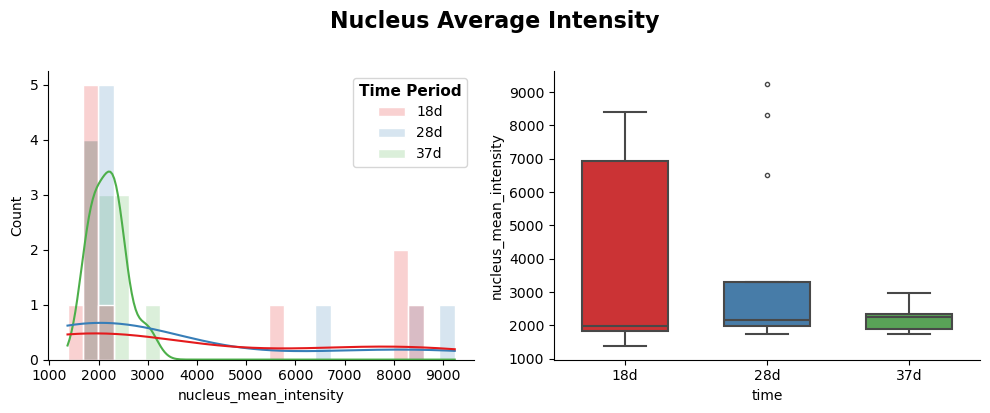

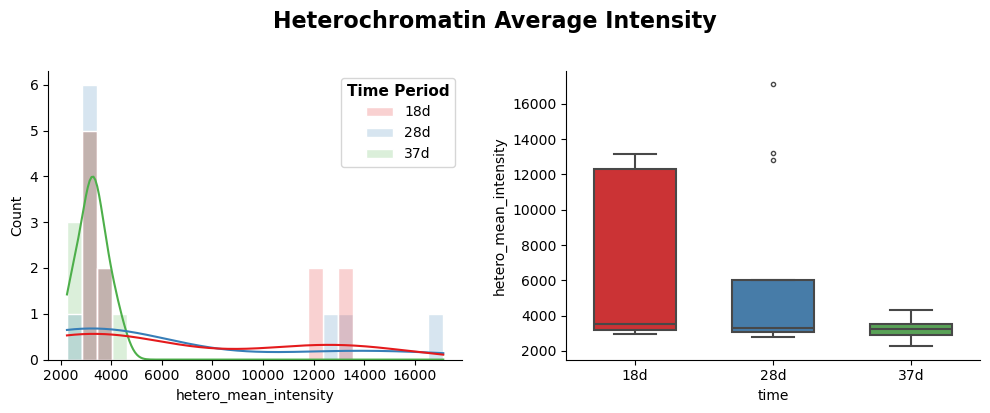

In [4]:
# nucleus_mean_intensity distribution
distribution_plot(df=df,variables='nucleus_mean_intensity',title='Nucleus Average Intensity')
# hetero_mean_intensity distribution
distribution_plot(df=df,variables='hetero_mean_intensity',title='Heterochromatin Average Intensity')

#### 2. Heterochromatin/Nuclear Area Ratio

- The Heterochromatin/Nuclear Area Ratio has a slightly increase, indicates that the nucleus may become more compact.

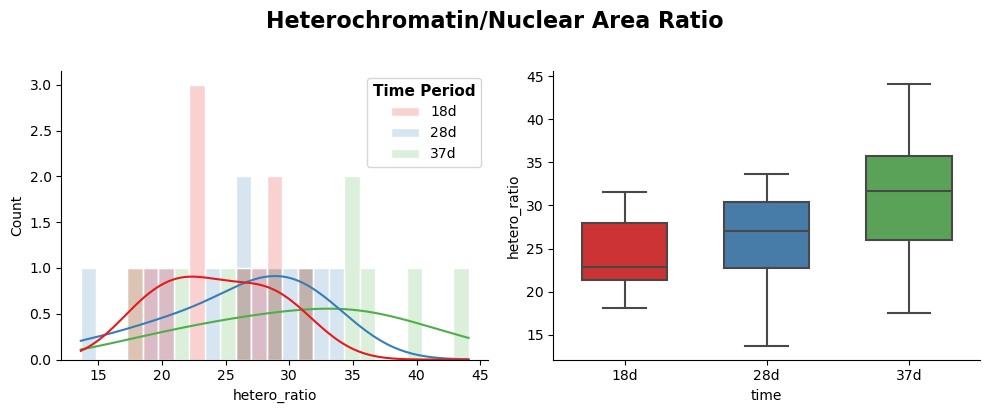

In [5]:
# the distribution of heterochromatin/nuclear area ratio
distribution_plot(df=df,variables='hetero_ratio',title='Heterochromatin/Nuclear Area Ratio')

#### 3. Quantity of Nuclear Pore Complex (NPC) on the Surface of Nuclear Membrane

- NPCs number increased on 28d, this may indicate heightened nucleocytoplasmic transport, associated with increased nuclear activity. The slight decrease by 37d might suggest a slowing down of this transport process.

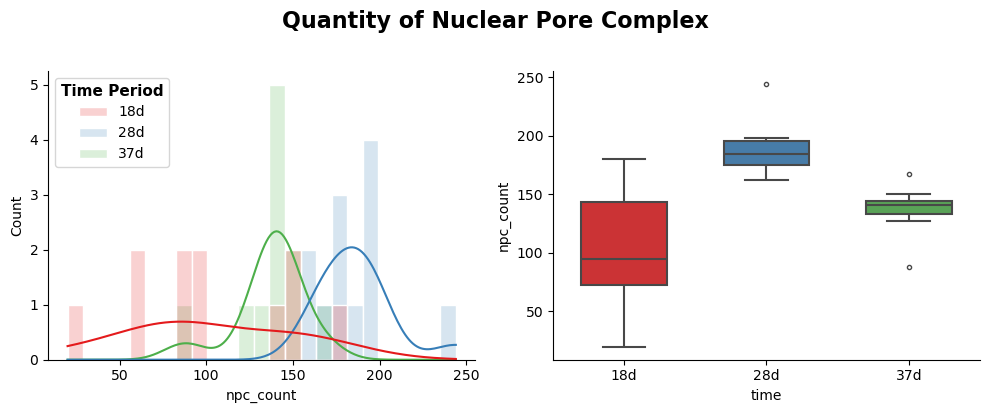

In [6]:
# npc_count distribution
distribution_plot(df=df,variables='npc_count',title='Quantity of Nuclear Pore Complex')

#### 4. Average NPC Fluorescence on the Surface of Nuclear Membrane

- The changes of Average NPC Fluorescence is similar with the Quantity of NPC. The activity or the density of NPC proteins is highest at 28d, which may associate with an increase in nuclear-cytoplasmic interactions. The slight decrease in both NPC quantity and fluorescence at 37d indicates that the transport activity might be slowing down.

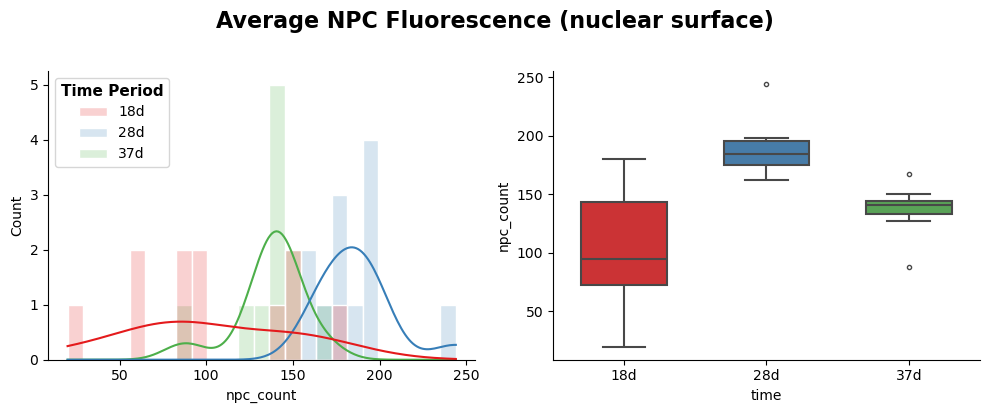

In [7]:
# npc_mean_fluorescence distribution
# Average NPC Fluorescence on the Surface of Nuclear Membrane
distribution_plot(df=df,variables='npc_count',title='Average NPC Fluorescence (nuclear surface)')

#### Summary

- Chromatin Decomposition: The decreasing intensity and range of heterochromatin and nucleus indicate the chromatin decomposing over time, which may reflect reduced nuclear activity or aging.
- Nuclear Compaction: The nucleus is likely undergoing compaction or becoming more stable over time, as indicated by the increasing heterochromatin/nuclear ratio. 
- NPC Activity: The NPC objects changes suggest that nuclear-cytoplasmic transport peaks around 28d but then slowdown and become more stable at 37d, possibly correlating with a more stable cell status or cell aging.